# Human Cell Classifier 
### Description :
A classifier to predict different human cells in a microscope image this classifier is trained on a Convolutional neural network (CNN) that is built to predict three human cells ['Adipose', 'Muscle', 'Red'].

The model is trained with 446 color images of all classes together and 446 greyscale images of all classes together so a total of 892 images with 50 epoch on a batch size of 16.

### Input size
(128,128,3)

#### Training more classes :
To train the model with more classes add more subdirectories of the particular class in the function Alter the "classes" variable on both .ipynb files and add required images in the subdirectory Do one hot encoding and train the more with suitable hyperparameters.

#### Frameworks and Languages used
* Tensorflow
* Scikit-learn
* Numpy
* Matlab

### Modules Required for training and data processing

In [734]:
#Modules
import cv2 as cv
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import os
import random as rd

### Classes variable

In [735]:
classes=['adipose','muscle','red']

### Function used to create a dataset or list of images and labels respectively by fetching images from each folder of each class

In [736]:
#Image fetching function
def create_dataset(source,classes):
    images=[]
    labels=[]
    total_count=0
    for cls in classes:
        count=0
        for filename in os.listdir(os.path.join(source,cls)):
            img=cv.imread(os.path.join(os.path.join(source,cls),filename))
            if img is not None:
                img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
                img=cv.resize(img,(128,128))
                img=np.array(img)/255.
                images.append(img)
                labels.append(cls)
                count+=1
                total_count+=1
        print(count," images converted to array and labels assigned for class ",cls)
    print()
    print(total_count," images converted to array and labels assigned")
    return images,labels

In [737]:
#Running image fetch function
source='../dataset/'
classes=['adipose','muscle','red']
images,labels=create_dataset(source=source,
                             classes=classes)

300  images converted to array and labels assigned for class  adipose
298  images converted to array and labels assigned for class  muscle
294  images converted to array and labels assigned for class  red

892  images converted to array and labels assigned


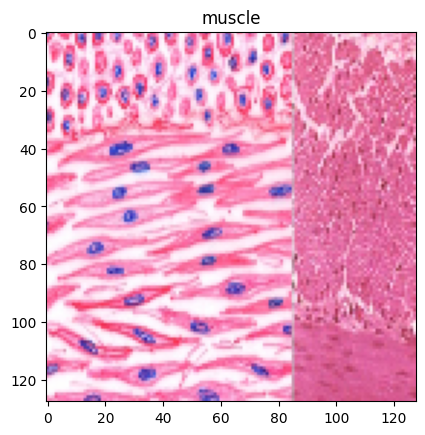

In [738]:
#Plotting image and label
rand=rd.randint(0,len(images))
plt.title(labels[rand])
plt.imshow(images[rand])

In [739]:
#Length of image list
print(type(images))
print(len(images))

<class 'list'>
892


In [740]:
#Length of label list
print(type(labels))
print(len(labels))

<class 'list'>
892


### Zipping Both images and labels list

In [741]:
dataset=list(zip(images,labels))

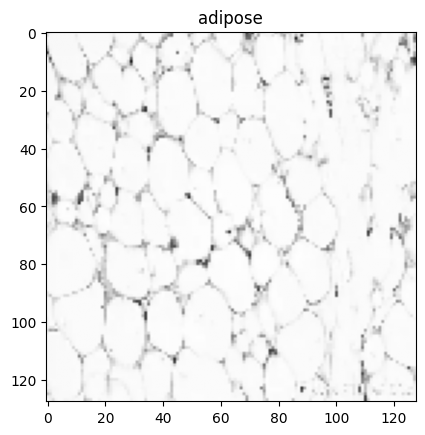

In [743]:
#Plotting image and label after zipping image and label
rand=rd.randint(0,len(dataset))
plt.title(dataset[rand][1])
plt.imshow(dataset[rand][0])

### Shuffling dataset

In [744]:
rd.shuffle(dataset)

In [745]:
#Dataset after shuffling
dataset

[(array([[[0.89019608, 0.4627451 , 0.6627451 ],
          [0.92156863, 0.49019608, 0.70980392],
          [0.8627451 , 0.41176471, 0.67058824],
          ...,
          [0.85098039, 0.36470588, 0.60392157],
          [0.77647059, 0.30980392, 0.54117647],
          [0.78823529, 0.32156863, 0.55294118]],
  
         [[0.70196078, 0.21960784, 0.48235294],
          [0.82745098, 0.3372549 , 0.61176471],
          [0.83137255, 0.3254902 , 0.61568627],
          ...,
          [0.81960784, 0.27058824, 0.54901961],
          [0.78823529, 0.27058824, 0.54901961],
          [0.76862745, 0.25490196, 0.52941176]],
  
         [[0.7254902 , 0.23137255, 0.51764706],
          [0.8       , 0.29803922, 0.58823529],
          [0.78823529, 0.27843137, 0.56862745],
          ...,
          [0.81176471, 0.24313725, 0.54509804],
          [0.85882353, 0.31764706, 0.61960784],
          [0.88235294, 0.34901961, 0.64705882]],
  
         ...,
  
         [[0.74901961, 0.24705882, 0.48627451],
          [0.7

### Function to split the shuffled dataset to X and Y array

In [746]:
#Get X and Y values
def get_xy(dataset):
    x=[]
    y=[]
    for data in dataset:
        x.append(data[0])
        y.append(data[1])
    x=np.array(x)
    y=np.array(y)
    return x,y

In [747]:
#Running function to get X and Y
x,y=get_xy(dataset=dataset)

In [749]:
y

array(['muscle', 'red', 'adipose', 'red', 'muscle', 'muscle', 'adipose',
       'adipose', 'muscle', 'muscle', 'red', 'muscle', 'adipose',
       'muscle', 'red', 'red', 'adipose', 'red', 'red', 'red', 'red',
       'muscle', 'muscle', 'red', 'muscle', 'muscle', 'adipose',
       'adipose', 'adipose', 'adipose', 'muscle', 'red', 'red', 'adipose',
       'muscle', 'muscle', 'red', 'red', 'adipose', 'adipose', 'red',
       'adipose', 'muscle', 'red', 'muscle', 'muscle', 'muscle', 'red',
       'adipose', 'red', 'muscle', 'adipose', 'red', 'adipose', 'adipose',
       'muscle', 'muscle', 'muscle', 'muscle', 'adipose', 'adipose',
       'adipose', 'muscle', 'muscle', 'muscle', 'muscle', 'red', 'red',
       'adipose', 'red', 'muscle', 'red', 'adipose', 'red', 'adipose',
       'red', 'red', 'muscle', 'muscle', 'muscle', 'muscle', 'adipose',
       'muscle', 'adipose', 'red', 'muscle', 'adipose', 'adipose', 'red',
       'adipose', 'adipose', 'red', 'muscle', 'muscle', 'red', 'adipose',
  

In [750]:
#Shape of X
x.shape

(892, 128, 128, 3)

In [751]:
#Shape of y
y.shape

(892,)

##### Reshaping y for doing one hot encoding

In [752]:
y=y.reshape(y.shape[0],1)

In [753]:
#y reshaped to (1,-1)
y

array([['muscle'],
       ['red'],
       ['adipose'],
       ['red'],
       ['muscle'],
       ['muscle'],
       ['adipose'],
       ['adipose'],
       ['muscle'],
       ['muscle'],
       ['red'],
       ['muscle'],
       ['adipose'],
       ['muscle'],
       ['red'],
       ['red'],
       ['adipose'],
       ['red'],
       ['red'],
       ['red'],
       ['red'],
       ['muscle'],
       ['muscle'],
       ['red'],
       ['muscle'],
       ['muscle'],
       ['adipose'],
       ['adipose'],
       ['adipose'],
       ['adipose'],
       ['muscle'],
       ['red'],
       ['red'],
       ['adipose'],
       ['muscle'],
       ['muscle'],
       ['red'],
       ['red'],
       ['adipose'],
       ['adipose'],
       ['red'],
       ['adipose'],
       ['muscle'],
       ['red'],
       ['muscle'],
       ['muscle'],
       ['muscle'],
       ['red'],
       ['adipose'],
       ['red'],
       ['muscle'],
       ['adipose'],
       ['red'],
       ['adipose'],
       ['adipos

In [754]:
y.shape

(892, 1)

### OneHotEncoder for performing training in the model all the text is converted to an one-hot encoded array

In [755]:
#Onehot encoding with sklearn
one_hot=OneHotEncoder(sparse_output=False,max_categories=3)
y_encode=one_hot.fit_transform(y)

In [756]:
y_encode

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [757]:
y_encode.shape

(892, 3)

### Train, Validation & Test split of data for training and testing
* Train = 90%
* Validation = 7%
* Testing = 3%

In [758]:
X_train,X_test,y_train,y_test=train_test_split(x,y_encode,test_size=.10)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=.30)

In [759]:
X_train.shape

(802, 128, 128, 3)

In [760]:
X_val.shape

(63, 128, 128, 3)

In [761]:
X_test.shape

(27, 128, 128, 3)

In [762]:
y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

# Cell Classifier (CNN model)

In [764]:
cell_classifier=tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=x[0].shape),
        tf.keras.layers.ZeroPadding2D(padding=(3,3)),
        tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(4,4),strides=(2,2),padding="valid"),
        tf.keras.layers.Dropout(rate=.2),
        tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding="valid"),
        tf.keras.layers.Dropout(rate=.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=32,activation="relu"),
        tf.keras.layers.Dense(units=16,activation="relu"),
        tf.keras.layers.Dense(units=3,activation="softmax"),
    ]
)

### Summary of the model

In [765]:
cell_classifier.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_19 (ZeroPad  (None, 134, 134, 3)       0         
 ding2D)                                                         
                                                                 
 conv2d_45 (Conv2D)          (None, 132, 132, 16)      448       
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 65, 65, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 65, 65, 16)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 63, 63, 32)        4640      
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 31, 31, 32)      

### Optimizer and Loss
* Adam optimizer
* Categorical Crossentropy Loss

In [766]:
cell_classifier.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

### Training the model for 50 epoch

In [767]:
epoch=50

#### Training & Validating model

In [768]:
history=cell_classifier.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val,y_val),
    epochs=epoch,
    batch_size=16
    )

Epoch 1/50
51/51 [==============================] - 3s 48ms/step - loss: 1.1769 - accuracy: 0.4489 - val_loss: 1.0204 - val_accuracy: 0.4762
Epoch 2/50
51/51 [==============================] - 2s 39ms/step - loss: 0.8594 - accuracy: 0.6022 - val_loss: 0.8846 - val_accuracy: 0.5397
Epoch 3/50
51/51 [==============================] - 2s 39ms/step - loss: 0.7717 - accuracy: 0.6359 - val_loss: 0.8790 - val_accuracy: 0.6984
Epoch 4/50
51/51 [==============================] - 2s 39ms/step - loss: 0.7111 - accuracy: 0.6883 - val_loss: 0.7429 - val_accuracy: 0.6667
Epoch 5/50
51/51 [==============================] - 2s 39ms/step - loss: 0.5759 - accuracy: 0.7506 - val_loss: 0.5836 - val_accuracy: 0.9206
Epoch 6/50
51/51 [==============================] - 2s 39ms/step - loss: 0.4052 - accuracy: 0.8603 - val_loss: 0.4678 - val_accuracy: 0.8095
Epoch 7/50
51/51 [==============================] - 2s 39ms/step - loss: 0.3170 - accuracy: 0.8791 - val_loss: 0.3780 - val_accuracy: 0.9206
Epoch 8/50
51

#### Evaluating model with Test set

In [769]:
cell_classifier.evaluate(X_test)

1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

#### Collecting history of loss and accuracy of the model during each epoch

In [770]:
history=history.history

##### Training Loss

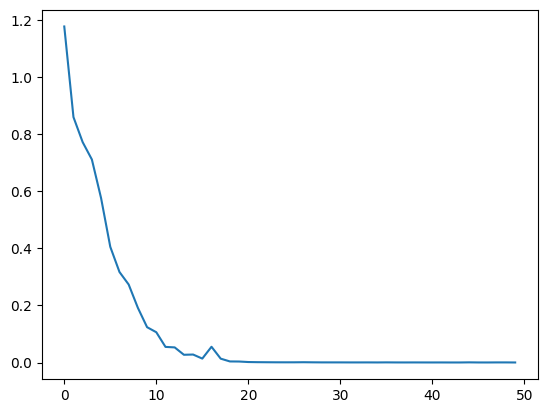

In [771]:
plt.plot(range(epoch),history['loss'],label="loss")

##### Validation Loss

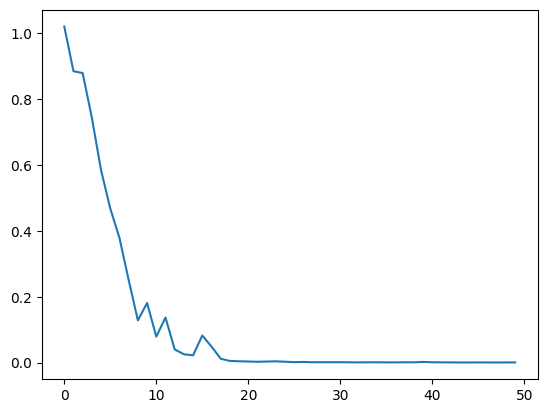

In [772]:
plt.plot(range(epoch),history['val_loss'],label="val_loss")

##### Combined loss of model

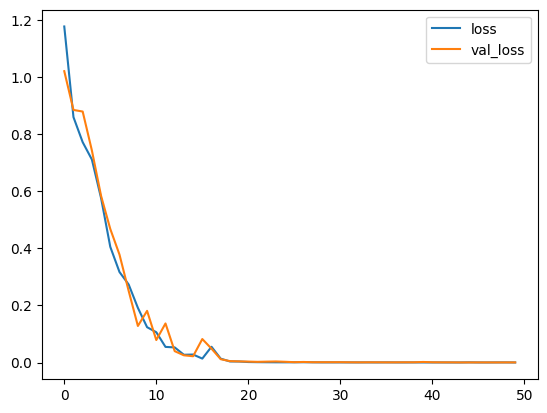

In [773]:
plt.plot(range(epoch),history['loss'],label="loss")
plt.plot(range(epoch),history['val_loss'],label="val_loss")
plt.legend()

##### Training Accuracy

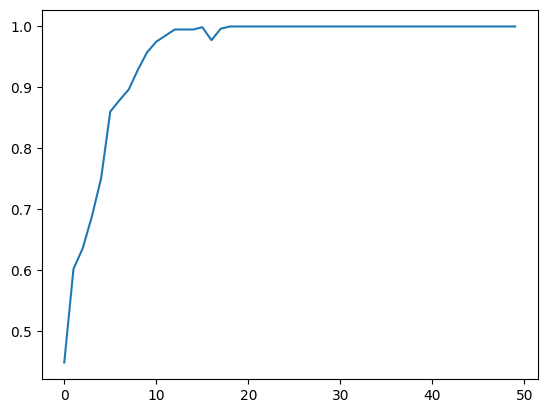

In [774]:
plt.plot(range(epoch),history['accuracy'],label="accuracy")

##### Validation Accuracy

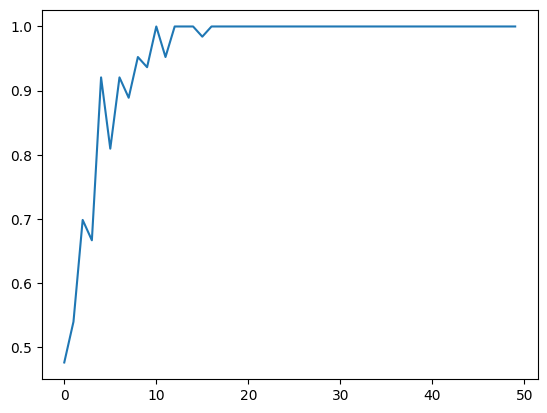

In [775]:
plt.plot(range(epoch),history['val_accuracy'],label="val_accuracy")

##### Combined accuracy of model

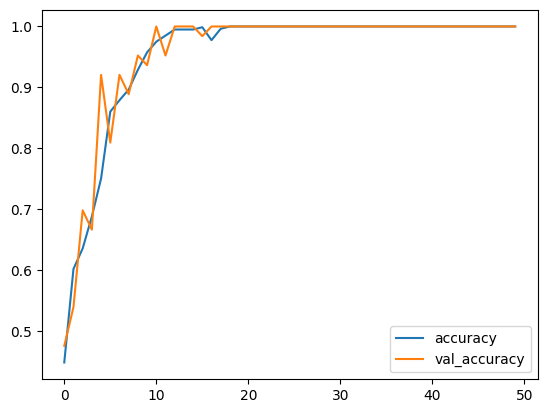

In [776]:
plt.plot(range(epoch),history['accuracy'],label="accuracy")
plt.plot(range(epoch),history['val_accuracy'],label="val_accuracy")
plt.legend()

#### Prediction for test set

In [777]:
predict=cell_classifier.predict(X_test)

1/1 [==============================] - 0s 82ms/step


#### Prediction

In [778]:
for pred in predict:
    print(np.argmax(pred),"|",pred)

1 | [2.5820094e-07 9.9999928e-01 4.9376195e-07]
0 | [9.9994230e-01 1.8309838e-05 3.9279370e-05]
1 | [6.6106855e-05 9.9993217e-01 1.6982591e-06]
2 | [1.2817467e-06 7.6897074e-12 9.9999869e-01]
1 | [7.0811225e-08 9.9999905e-01 7.7849023e-07]
0 | [9.9999976e-01 1.0231603e-10 2.0304060e-07]
0 | [1.0000000e+00 2.5152222e-08 2.5092753e-12]
1 | [5.6962076e-08 9.9999952e-01 4.9031968e-07]
1 | [2.2688171e-05 9.9978024e-01 1.9712078e-04]
1 | [2.5069364e-06 9.9999714e-01 3.3809675e-07]
1 | [3.5548509e-10 1.0000000e+00 2.1471027e-09]
2 | [1.1476442e-05 1.0096456e-05 9.9997842e-01]
2 | [3.8831860e-07 1.9593749e-09 9.9999964e-01]
0 | [0.96321625 0.01993601 0.01684771]
2 | [1.4691065e-05 2.7268354e-05 9.9995804e-01]
2 | [3.8101798e-04 4.7570349e-05 9.9957138e-01]
0 | [1.0000000e+00 4.9993088e-13 1.6948517e-08]
2 | [1.4835969e-09 8.7358584e-12 1.0000000e+00]
1 | [1.3495458e-12 1.0000000e+00 6.3792283e-10]
0 | [9.9571335e-01 3.8022068e-03 4.8436358e-04]
0 | [9.99999642e-01 1.40542725e-11 4.06487771e-07

#### Actual test label

In [779]:
for test in y_test:
    print(np.argmax(test),"|",test)

1 | [0. 1. 0.]
0 | [1. 0. 0.]
1 | [0. 1. 0.]
2 | [0. 0. 1.]
1 | [0. 1. 0.]
0 | [1. 0. 0.]
0 | [1. 0. 0.]
1 | [0. 1. 0.]
1 | [0. 1. 0.]
1 | [0. 1. 0.]
1 | [0. 1. 0.]
2 | [0. 0. 1.]
2 | [0. 0. 1.]
0 | [1. 0. 0.]
2 | [0. 0. 1.]
2 | [0. 0. 1.]
0 | [1. 0. 0.]
2 | [0. 0. 1.]
1 | [0. 1. 0.]
0 | [1. 0. 0.]
0 | [1. 0. 0.]
0 | [1. 0. 0.]
0 | [1. 0. 0.]
1 | [0. 1. 0.]
0 | [1. 0. 0.]
2 | [0. 0. 1.]
1 | [0. 1. 0.]


### Prediction and Actual values compared

In [780]:
for pred,test in zip(predict,y_test):
    print("Predicted |",np.argmax(pred),"| Actual |",np.argmax(test),"|",True if np.argmax(pred) == np.argmax(test) else False)

Predicted | 1 | Actual | 1 | True
Predicted | 0 | Actual | 0 | True
Predicted | 1 | Actual | 1 | True
Predicted | 2 | Actual | 2 | True
Predicted | 1 | Actual | 1 | True
Predicted | 0 | Actual | 0 | True
Predicted | 0 | Actual | 0 | True
Predicted | 1 | Actual | 1 | True
Predicted | 1 | Actual | 1 | True
Predicted | 1 | Actual | 1 | True
Predicted | 1 | Actual | 1 | True
Predicted | 2 | Actual | 2 | True
Predicted | 2 | Actual | 2 | True
Predicted | 0 | Actual | 0 | True
Predicted | 2 | Actual | 2 | True
Predicted | 2 | Actual | 2 | True
Predicted | 0 | Actual | 0 | True
Predicted | 2 | Actual | 2 | True
Predicted | 1 | Actual | 1 | True
Predicted | 0 | Actual | 0 | True
Predicted | 0 | Actual | 0 | True
Predicted | 0 | Actual | 0 | True
Predicted | 0 | Actual | 0 | True
Predicted | 1 | Actual | 1 | True
Predicted | 0 | Actual | 0 | True
Predicted | 2 | Actual | 2 | True
Predicted | 1 | Actual | 1 | True


### Checking prediction using image plot

red | red


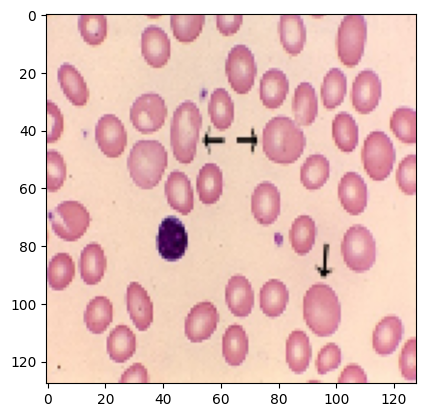

In [785]:
check_value=11
print(classes[np.argmax(predict[check_value])],"|",classes[np.argmax(y_test[check_value])])
plt.imshow(X=X_test[check_value])

## Testing on new data

In [786]:
sample_img='../sample/sample-adipose.jpg'
sample_img=tf.keras.preprocessing.image.load_img(sample_img,target_size=(128,128))

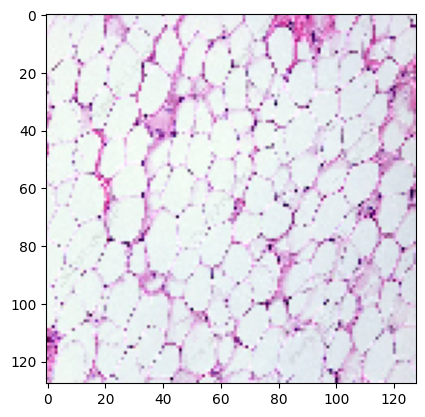

In [787]:
plt.imshow(sample_img)

In [788]:
sample_img=tf.keras.preprocessing.image.img_to_array(sample_img)
sample_img = np.expand_dims(sample_img, axis=0)
sample_img=sample_img/255.

In [789]:
sample_img.shape

(1, 128, 128, 3)

In [790]:
sample_prediction=cell_classifier.predict(sample_img)

1/1 [==============================] - 0s 16ms/step


In [791]:
classes[np.argmax(sample_prediction)]

'adipose'

In [792]:
sample_img='../sample/sample-muscle.webp'
sample_img=tf.keras.preprocessing.image.load_img(sample_img,target_size=(128,128))

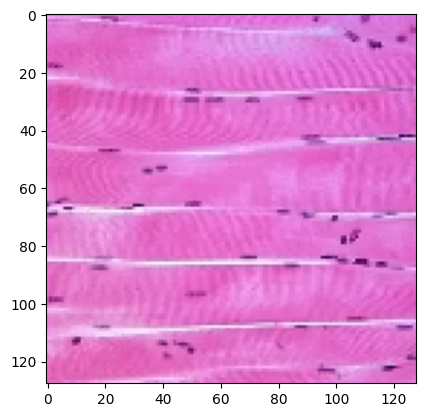

In [793]:
plt.imshow(sample_img)

In [794]:
sample_img=tf.keras.preprocessing.image.img_to_array(sample_img)
sample_img = np.expand_dims(sample_img, axis=0)
sample_img=sample_img/255.

In [795]:
sample_img.shape

(1, 128, 128, 3)

In [796]:
sample_prediction=cell_classifier.predict(sample_img)

1/1 [==============================] - 0s 14ms/step


In [797]:
classes[np.argmax(sample_prediction)]

'muscle'

### Saving model

In [798]:
cell_classifier.save('../src/cell_classifier.keras')